## General idea of comparing iSAFE and iSWEEP

Much of this code is **likely** what I ran to make figures.
- Except I may have updated the tabular data with additional simulations.
- I ay **likely** because I don't remember when I ran this.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [19]:
plt.rc('font',size=14)

### Loading and manipulating data

There are some sloppy code blocks where I make bins of equal size for (selection coefficient and allele frequency)

In [20]:
theheader = ['folder','index','method','freq','selcoef','rank','freqmad','locmad']
theheader2 = ['subfolder','indexfolder','method','freq','selcoef','rank','freqmad','locmad']

In [22]:
isafes = ['ranks-isafe-0.04.tsv',
          'ranks-isafe-hugeearly.tsv',
          'ranks-isafe-hugelate.tsv',
          'ranks-isafe-0.035.tsv',
          'ranks-isafe-0.03.tsv',
          'ranks-isafe-0.025.tsv',
          'ranks-isafe-0.02.tsv',
          'ranks-isafe-0.015.tsv'
         ]

f = isafes[0]
isafetable = pd.read_csv(f,sep='\t')
isafetable.columns = theheader
for isafe in isafes:
    nexttable = pd.read_csv(isafe,sep='\t')
    nexttable.columns = theheader
    isafetable = pd.concat((isafetable,nexttable))
    # isafetable.reset_index(inplace=True)
nexttable = pd.read_csv('bottle.ehh.v2.isafe.tsv',sep='\t')
nexttable = nexttable[theheader2]
nexttable.columns = theheader
isafetable = pd.concat((isafetable,nexttable))
isafetable['method'] = 'iSAFE'

isafetable

,folder,index,method,freq,selcoef,rank,freqmad,locmad
0,bottle-unif-freq/bottle-huge-scrapped,1,iSAFE,0.3334,0.040,3.0,0.01412,58725.0
1,bottle-unif-freq/bottle-huge-scrapped,2,iSAFE,0.3278,0.040,6.0,0.02060,91422.3
2,bottle-unif-freq/bottle-huge-scrapped,3,iSAFE,0.3348,0.040,6.0,0.02826,92564.6
3,bottle-unif-freq/bottle-huge-scrapped,4,iSAFE,0.6198,0.040,3.0,0.02866,44912.4
4,bottle-unif-freq/bottle-huge-scrapped,5,iSAFE,0.4908,0.040,3.0,0.05396,103760.3
...,...,...,...,...,...,...,...,...
995,LARGEsLATEt,96,iSAFE,0.4604,0.035,1.0,0.04572,102205.6
996,LARGEsLATEt,97,iSAFE,0.6903,0.035,2.0,0.03388,27730.8
997,LARGEsLATEt,98,iSAFE,0.8700,0.035,2.0,0.04075,48136.4
998,LARGEsLATEt,99,iSAFE,0.3344,0.035,4.0,0.09329,132388.8


In [23]:
isweeps = ['ranks-isweep-0.04.tsv',
          'ranks-isweep-hugeearly.tsv',
          'ranks-isweep-hugelate.tsv',
          'ranks-isweep-0.035.tsv',
          'ranks-isweep-0.03.tsv',
          'ranks-isweep-0.025.tsv',
          'ranks-isweep-0.02.tsv',
          'ranks-isweep-0.015.tsv'
         ]

f = isweeps[0]
isweeptable = pd.read_csv(f,sep='\t')
isweeptable.columns = theheader
for isweep in isweeps:
    nexttable = pd.read_csv(isweep,sep='\t')
    nexttable.columns = theheader
    isweeptable = pd.concat((isweeptable,nexttable))
    # isafetable.reset_index(inplace=True)
nexttable = pd.read_csv('bottle.ehh.v2.isweep.tsv',sep='\t')
nexttable = nexttable[theheader2]
nexttable.columns = theheader
isweeptable = pd.concat((isweeptable,nexttable))
isweeptable['method'] = 'iSWEEP'

isweeptable

,folder,index,method,freq,selcoef,rank,freqmad,locmad
0,bottle-unif-freq/bottle-huge-scrapped,1,iSWEEP,0.3334,0.040,4.0,0.01935,67558.3
1,bottle-unif-freq/bottle-huge-scrapped,2,iSWEEP,0.3278,0.040,1.0,0.02145,83763.6
2,bottle-unif-freq/bottle-huge-scrapped,3,iSWEEP,0.3348,0.040,8.0,0.03129,112950.2
3,bottle-unif-freq/bottle-huge-scrapped,4,iSWEEP,0.6198,0.040,3.0,0.01520,22513.6
4,bottle-unif-freq/bottle-huge-scrapped,5,iSWEEP,0.4908,0.040,3.0,0.02636,24435.7
...,...,...,...,...,...,...,...,...
995,LARGEsLATEt,96,iSWEEP,0.4604,0.035,1.0,0.04867,122116.2
996,LARGEsLATEt,97,iSWEEP,0.6903,0.035,12.0,0.17537,133064.5
997,LARGEsLATEt,98,iSWEEP,0.8700,0.035,3.0,0.01157,26547.1
998,LARGEsLATEt,99,iSWEEP,0.3344,0.035,2.0,0.05789,98836.2


In [7]:
binvalues=[0.1,0.3,0.5,0.7,0.9]
isweeptable = isweeptable[theheader]
isweeptable['freqbins'] = pd.cut(isweeptable['freq'],bins=binvalues,labels=['(0.1, 0.3]','(0.3, 0.5]','(0.5, 0.7]','(0.7, 0.9]'])
# isweeptable.reset_index(inplace=True)
pd.cut(isweeptable['freq'],bins=binvalues).value_counts()

freq
(0.1, 0.3]    647
(0.3, 0.5]    447
(0.7, 0.9]    376
(0.5, 0.7]    358
Name: count, dtype: int64

In [8]:
binvalues=[0.1,0.3,0.5,0.7,0.9]
isafetable = isafetable[theheader]
isafetable['freqbins'] = pd.cut(isafetable['freq'],bins=binvalues,labels=['(0.1, 0.3]','(0.3, 0.5]','(0.5, 0.7]','(0.7, 0.9]'])
# isweeptable.reset_index(inplace=True)
pd.cut(isafetable['freq'],bins=binvalues).value_counts()

freq
(0.1, 0.3]    647
(0.3, 0.5]    447
(0.7, 0.9]    376
(0.5, 0.7]    358
Name: count, dtype: int64

In [9]:
mx1=50
mx2=48

freqlabels = ['(0.1, 0.3]','(0.3, 0.5]','(0.5, 0.7]','(0.7, 0.9]']
selcoeflabels = [0.015,0.02,0.025,0.03,0.035,0.04]

tups1 = [('(0.1, 0.3]',s) for s in selcoeflabels]
tups2 = [('(0.3, 0.5]',s) for s in selcoeflabels]
tups3 = [('(0.5, 0.7]',s) for s in selcoeflabels]
tups4 = [('(0.7, 0.9]',s) for s in selcoeflabels]
tups = tups1 + tups2 + tups3 + tups4

# first subtable
first = tups[0]
reducedtable = isweeptable[(isweeptable['selcoef']==first[1])&(isweeptable['freqbins']==first[0])][:mx1]

for t in tups[1:]:
    subtable = isweeptable[(isweeptable['selcoef']==t[1])&(isweeptable['freqbins']==t[0])]
    try:
        subtable=subtable[:mx1]
    except:
        subtable=subtable[:mx2]
    reducedtable = pd.concat((reducedtable,subtable))
reducedtable.reset_index(inplace=True)
reducedtableisweep = reducedtable


In [10]:
mx1=50
mx2=48

freqlabels = ['(0.1, 0.3]','(0.3, 0.5]','(0.5, 0.7]','(0.7, 0.9]']
selcoeflabels = [0.015,0.02,0.025,0.03,0.035,0.04]

tups1 = [('(0.1, 0.3]',s) for s in selcoeflabels]
tups2 = [('(0.3, 0.5]',s) for s in selcoeflabels]
tups3 = [('(0.5, 0.7]',s) for s in selcoeflabels]
tups4 = [('(0.7, 0.9]',s) for s in selcoeflabels]
tups = tups1 + tups2 + tups3 + tups4

# first subtable
first = tups[0]
reducedtable = isafetable[(isweeptable['selcoef']==first[1])&(isafetable['freqbins']==first[0])][:mx1]

for t in tups[1:]:
    subtable = isafetable[(isafetable['selcoef']==t[1])&(isafetable['freqbins']==t[0])]
    try:
        subtable=subtable[:mx1]
    except:
        subtable=subtable[:mx2]
    reducedtable = pd.concat((reducedtable,subtable))
reducedtable.reset_index(inplace=True)
reducedtableisafe = reducedtable


In [11]:
redtable = pd.concat((reducedtableisweep,reducedtableisafe))
redtable = redtable[theheader]
binvalues=[0.1,0.3,0.5,0.7,0.9]
redtable['freqbins'] = pd.cut(redtable['freq'],bins=binvalues,labels=['(0.1, 0.3]','(0.3, 0.5]','(0.5, 0.7]','(0.7, 0.9]'])
redtable.reset_index(inplace=True)
redtable.head()

,level_0,folder,index,method,freq,selcoef,rank,freqmad,locmad,freqbins
0,0,TINYsEARLYt,1,iSWEEP,0.1003,0.015,1.0,0.00431,97197.7,"(0.1, 0.3]"
1,1,TINYsEARLYt,4,iSWEEP,0.1269,0.015,1.0,0.02481,69979.6,"(0.1, 0.3]"
2,2,TINYsEARLYt,5,iSWEEP,0.1356,0.015,2.0,0.03868,162418.6,"(0.1, 0.3]"
3,3,TINYsEARLYt,6,iSWEEP,0.1303,0.015,5.0,0.01522,201154.0,"(0.1, 0.3]"
4,4,TINYsEARLYt,7,iSWEEP,0.1156,0.015,NaN,0.35318,1785790.4,"(0.1, 0.3]"


## Plots for allele frequency bin analysis

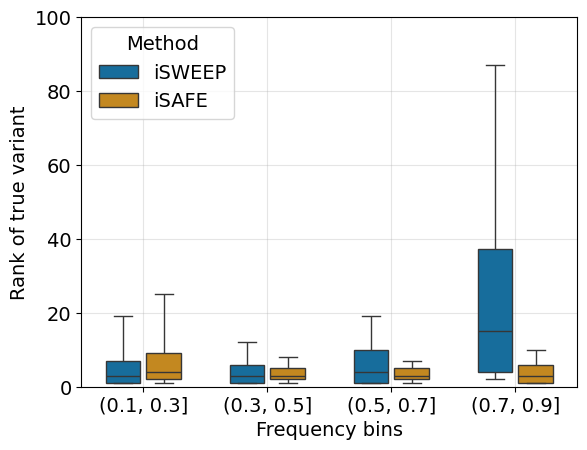

In [12]:
sns.boxplot(redtable,
            x='freqbins',
            y='rank',
            hue='method',
            whis=[10,90],
            showfliers=False,
            palette='colorblind',
            gap=0.15,
            width=0.66,
           )
plt.ylim(0,100)
plt.xlim(None)
plt.xlabel('Frequency bins')
plt.ylabel('Rank of true variant')
plt.legend(title='Method',
           fontsize=14,
          )
plt.grid(alpha=0.33)

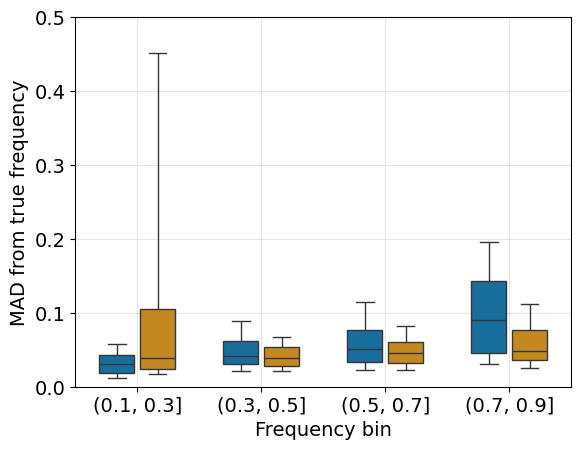

In [13]:
sns.boxplot(redtable,
            x='freqbins',
            y='freqmad',
            hue='method',
            whis=[10,90],
            showfliers=False,
            palette='colorblind',
            gap=0.15,
            width=0.66
           )
plt.ylim(0,0.5)
plt.xlim(None)
plt.xlabel('Frequency bin')
plt.ylabel('MAD from true frequency')
plt.legend(title='Method',
           fontsize=14,
          ).remove()
plt.grid(alpha=0.33)

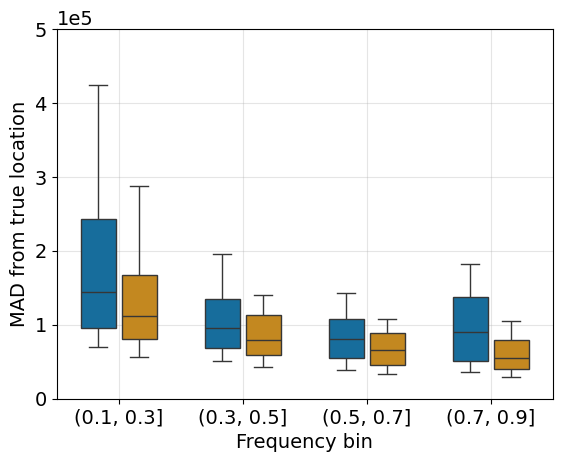

In [42]:
sns.boxplot(redtable,
            x='freqbins',
            y='locmad',
            hue='method',
            whis=[10,90],
            showfliers=False,
            palette='colorblind',
                        gap=0.15,
            width=0.66,
           )
plt.ylim(0,5e5)
plt.xlim(None)
plt.xlabel('Frequency bin')
plt.ylabel('MAD from true location')
plt.legend(title='Method',
           fontsize=14,
          ).remove()
plt.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
plt.grid(alpha=0.33)

## Plots for selection coefficient analysis

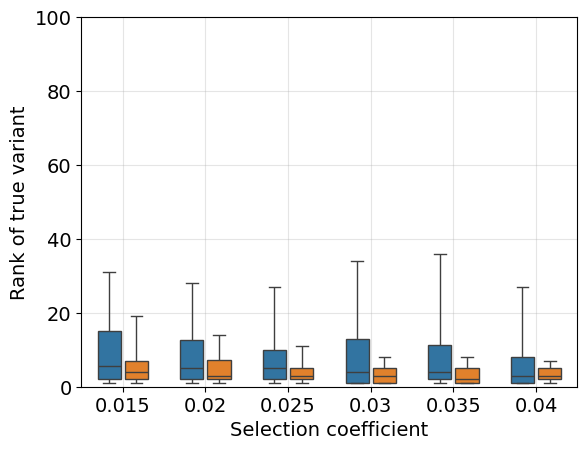

In [16]:
sns.boxplot(redtable,
            x='selcoef',
            y='rank',
            hue='method',
            whis=[10,90],
            showfliers=False,
            palette='tab10',
            gap=0.15,
            width=0.66,
           )
plt.ylim(0,100)
plt.xlim(None)
plt.xlabel('Selection coefficient')
plt.ylabel('Rank of true variant')
plt.legend(title='Method',
           fontsize=14,
          ).remove()
plt.grid(alpha=0.33)

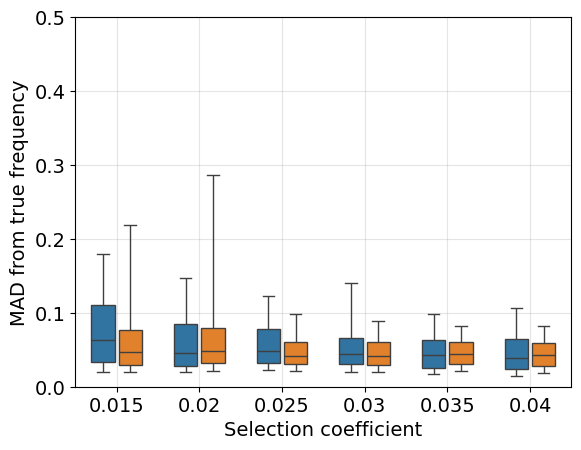

In [44]:
sns.boxplot(redtable,
            x='selcoef',
            y='freqmad',
            hue='method',
            whis=[10,90],
            showfliers=False,
            palette='tab10',
            gap=0.15,
            width=0.66,
           )
plt.ylim(0,0.5)
plt.xlim(None)
plt.xlabel('Selection coefficient')
plt.ylabel('MAD from true frequency')
plt.legend(title='Method',
           fontsize=14,
          ).remove()
plt.grid(alpha=0.33)

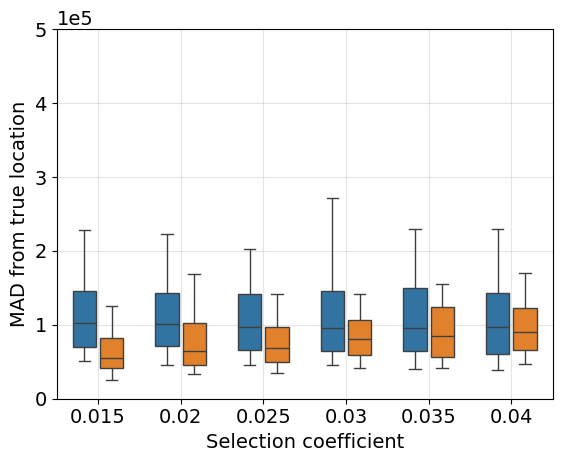

In [45]:
sns.boxplot(redtable,
            x='selcoef',
            y='locmad',
            hue='method',
            whis=[10,90],
            showfliers=False,
            palette='tab10',
            gap=0.15,
            width=0.66,
           )
plt.ylim(0,5e5)
plt.xlim(None)
plt.xlabel('Selection coefficient')
plt.ylabel('MAD from true location')
plt.legend(title='Method',
           fontsize=14,
          ).remove()
plt.grid(alpha=0.33)
plt.ticklabel_format(style='sci',axis='y',scilimits=(0,0))